In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#Reading train and test datasets in to pandas dataframes
df_train = pd.read_csv("/Users/akhilanunna/Documents/Documents/WellsfargoCompetition/Wellsfargotrainset.csv")
df_train.head()

df_test = pd.read_csv("/Users/akhilanunna/Documents/Documents/WellsfargoCompetition/Wellsfargotestset.csv")
df_test.head()

,,,,,,,,,,,,,,,,,,,,,,,Table 1
dataset_id,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,PWD_UPDT_TS,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,ALERT_TRGR_CD,DVC_TYPE_TXT,AUTHC_PRIM_TYPE_CD,AUTHC_SCNDRY_STAT_TXT,CUST_ZIP,CUST_STATE,PH_NUM_UPDT_TS,CUST_SINCE_DT,TRAN_TS,TRAN_DT,ACTN_CD,ACTN_INTNL_TXT,TRAN_TYPE_CD,ACTVY_DT
1,54.25,0,23,4,634,9/18/2020 9:33:44,charter communications inc,southwest,california,MOBL,DESKTOP,UN_PWD,ALLOW,55414,MN,7/8/2018 9:45:37,2011-02-19 00:00:00,1/8/2021 11:33:44,1/8/2021,SCHPMT,P2P_COMMIT,P2P,1/8/2021
2,110.3,0,56,3,1876,5/16/2021 17:2:31,comcast,mountain,colorado,ONLN,MOBILE,UN_PWD,ALLOW,77095,TX,NaN,2001-11-20 00:00:00,2/27/2021 7:2:31,2/27/2021,SCHPMT,P2P_COMMIT,P2P,2/27/2021
3,515.95,0,33,5,40,NaN,point broadband fiber holding llc,mid atlantic,virginia,MOBL,MOBILE,UN_PWD,ALLOW,94102,CA,8/28/2018 1:4:7,1999-10-17 00:00:00,4/22/2021 11:25:16,4/22/2021,SCHPMT,P2P_COMMIT,P2P,4/22/2021
4,42.78,0,60,3,367,2/18/2021 4:5:0,t-mobile usa inc.,southwest,california,MOBL,MOBILE,UN_PWD,ALLOW,93263,CA,7/3/2019 6:29:28,1998-07-03 00:00:00,6/17/2021 11:5:0,6/17/2021,SCHPMT,P2P_COMMIT,P2P,6/17/2021


In [3]:
#rearranging traindataset
df_train = df_train.reset_index()
df_train.columns = df_train.iloc[0]
df_train = df_train.iloc[1: , :]

In [4]:
df_train[1:5]

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,PWD_UPDT_TS,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,ALERT_TRGR_CD,...,CUST_STATE,PH_NUM_UPDT_TS,CUST_SINCE_DT,TRAN_TS,TRAN_DT,ACTN_CD,ACTN_INTNL_TXT,TRAN_TYPE_CD,ACTVY_DT,FRAUD_NONFRAUD
2,65.19,0,45,5,2721,NaN,charter communications,southwest,california,MOBL,...,CA,NaN,1971-01-07 00:00:00,1/13/2021 19:19:37,1/13/2021,SCHPMT,P2P_COMMIT,P2P,1/13/2021,Non-Fraud
3,54.84,34570.63,36,8,1531,12/22/2021 10:42:51,utah broadband llc,mountain,utah,ONLN,...,MD,5/5/2019 1:8:39,1994-02-01 00:00:00,4/8/2021 9:42:51,4/8/2021,SCHPMT,P2P_COMMIT,P2P,4/8/2021,Fraud
4,0.01,0,62,3,835,2/8/2020 7:28:31,t-mobile usa inc.,southwest,california,MOBL,...,NV,2/16/2019 6:45:37,2001-11-01 00:00:00,8/10/2021 15:28:31,8/10/2021,SCHPMT,P2P_COMMIT,P2P,8/10/2021,Non-Fraud
5,497.08,12725.18,81,2,1095,12/28/2020 12:12:44,cogent communications,south central,texas,MOBL,...,UT,5/8/2020 10:27:6,1987-02-07 00:00:00,6/27/2021 11:12:44,6/27/2021,SCHPMT,P2P_COMMIT,P2P,6/27/2021,Fraud


In [5]:
#rearranging testdataset
df_test = df_test.reset_index()
df_test.columns = df_test.iloc[0]
df_test = df_test.iloc[1: , :]

# Understanding the Train Dataset

In [6]:
df_train.head(5).transpose()

,1,2,3,4,5
0,,,,,
TRAN_AMT,5.38,65.19,54.84,0.01,497.08
ACCT_PRE_TRAN_AVAIL_BAL,23619.91,0,34570.63,0,12725.18
CUST_AGE,47,45,36,62,81
OPEN_ACCT_CT,4,5,8,3,2
WF_dvc_age,2777,2721,1531,835,1095
PWD_UPDT_TS,1/16/2018 11:3:58,NaN,12/22/2021 10:42:51,2/8/2020 7:28:31,12/28/2020 12:12:44
CARR_NAME,cox communications inc.,charter communications,utah broadband llc,t-mobile usa inc.,cogent communications
RGN_NAME,southwest,southwest,mountain,southwest,south central
STATE_PRVNC_TXT,nevada,california,utah,california,texas


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 1 to 14000
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   TRAN_AMT                 14000 non-null  object
 1   ACCT_PRE_TRAN_AVAIL_BAL  14000 non-null  object
 2   CUST_AGE                 14000 non-null  object
 3   OPEN_ACCT_CT             14000 non-null  object
 4   WF_dvc_age               14000 non-null  object
 5   PWD_UPDT_TS              10875 non-null  object
 6   CARR_NAME                11291 non-null  object
 7   RGN_NAME                 11291 non-null  object
 8   STATE_PRVNC_TXT          11291 non-null  object
 9   ALERT_TRGR_CD            14000 non-null  object
 10  DVC_TYPE_TXT             12239 non-null  object
 11  AUTHC_PRIM_TYPE_CD       14000 non-null  object
 12  AUTHC_SCNDRY_STAT_TXT    13926 non-null  object
 13  CUST_ZIP                 14000 non-null  object
 14  CUST_STATE               13964 non-nul

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 1 to 6000
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dataset_id               6000 non-null   object
 1   TRAN_AMT                 6000 non-null   object
 2   ACCT_PRE_TRAN_AVAIL_BAL  6000 non-null   object
 3   CUST_AGE                 6000 non-null   object
 4   OPEN_ACCT_CT             6000 non-null   object
 5   WF_dvc_age               6000 non-null   object
 6   PWD_UPDT_TS              4682 non-null   object
 7   CARR_NAME                4825 non-null   object
 8   RGN_NAME                 4825 non-null   object
 9   STATE_PRVNC_TXT          4825 non-null   object
 10  ALERT_TRGR_CD            6000 non-null   object
 11  DVC_TYPE_TXT             5197 non-null   object
 12  AUTHC_PRIM_TYPE_CD       6000 non-null   object
 13  AUTHC_SCNDRY_STAT_TXT    5974 non-null   object
 14  CUST_ZIP                 6000 non-null  

# Cleaning the Train and Test Dataset

In [9]:
df_train['TRAN_AMT'] = df_train['TRAN_AMT'].apply(lambda x: float(x))
df_train['CUST_ZIP'] = df_train['CUST_ZIP'].apply(lambda x: int(x))
df_train['ACCT_PRE_TRAN_AVAIL_BAL'] = df_train['ACCT_PRE_TRAN_AVAIL_BAL'].apply(lambda x: float(x))
df_train['OPEN_ACCT_CT'] = df_train['OPEN_ACCT_CT'].apply(lambda x: int(x))
df_train['CUST_AGE'] = df_train['CUST_AGE'].apply(lambda x: int(x))
df_train['WF_dvc_age'] = df_train['WF_dvc_age'].apply(lambda x: int(x))
df_train['TRAN_TS'] = df_train['TRAN_TS'].apply(lambda x: pd.Timestamp(x))

In [10]:
df_test['dataset_id'] = df_test['dataset_id'].apply(lambda x: int(x))
df_test['TRAN_AMT'] = df_test['TRAN_AMT'].apply(lambda x: float(x))
df_test['CUST_ZIP'] = df_test['CUST_ZIP'].apply(lambda x: int(x))
df_test['ACCT_PRE_TRAN_AVAIL_BAL'] = df_test['ACCT_PRE_TRAN_AVAIL_BAL'].apply(lambda x: float(x))
df_test['OPEN_ACCT_CT'] = df_test['OPEN_ACCT_CT'].apply(lambda x: int(x))
df_test['CUST_AGE'] = df_test['CUST_AGE'].apply(lambda x: int(x))
df_test['WF_dvc_age'] = df_test['WF_dvc_age'].apply(lambda x: int(x))
df_test['TRAN_TS'] = df_test['TRAN_TS'].apply(lambda x: pd.Timestamp(x))

In [11]:
df_train.isnull().sum()

0
TRAN_AMT                      0
ACCT_PRE_TRAN_AVAIL_BAL       0
CUST_AGE                      0
OPEN_ACCT_CT                  0
WF_dvc_age                    0
PWD_UPDT_TS                3125
CARR_NAME                  2709
RGN_NAME                   2709
STATE_PRVNC_TXT            2709
ALERT_TRGR_CD                 0
DVC_TYPE_TXT               1761
AUTHC_PRIM_TYPE_CD            0
AUTHC_SCNDRY_STAT_TXT        74
CUST_ZIP                      0
CUST_STATE                   36
PH_NUM_UPDT_TS             7061
CUST_SINCE_DT                 0
TRAN_TS                       0
TRAN_DT                       0
ACTN_CD                       0
ACTN_INTNL_TXT                0
TRAN_TYPE_CD                  0
ACTVY_DT                      0
FRAUD_NONFRAUD                0
dtype: int64

In [12]:
df_test.isnull().sum()

0
dataset_id                    0
TRAN_AMT                      0
ACCT_PRE_TRAN_AVAIL_BAL       0
CUST_AGE                      0
OPEN_ACCT_CT                  0
WF_dvc_age                    0
PWD_UPDT_TS                1318
CARR_NAME                  1175
RGN_NAME                   1175
STATE_PRVNC_TXT            1175
ALERT_TRGR_CD                 0
DVC_TYPE_TXT                803
AUTHC_PRIM_TYPE_CD            0
AUTHC_SCNDRY_STAT_TXT        26
CUST_ZIP                      0
CUST_STATE                   22
PH_NUM_UPDT_TS             3036
CUST_SINCE_DT                 0
TRAN_TS                       0
TRAN_DT                       0
ACTN_CD                       0
ACTN_INTNL_TXT                0
TRAN_TYPE_CD                  0
ACTVY_DT                      0
dtype: int64

In [13]:
df_train[(df_train.CARR_NAME.isnull() & df_train.RGN_NAME.isnull())]['FRAUD_NONFRAUD'].value_counts()
# this means that wherever the CARR_NAME is null, the RGN_NAME and STATE_PRVNC_TXT is null
# almost 47% of the fraud values are present when these values are null

Fraud        1969
Non-Fraud     740
Name: FRAUD_NONFRAUD, dtype: int64

In [14]:
df_train['FRAUD_NONFRAUD'].value_counts()

Non-Fraud    9836
Fraud        4164
Name: FRAUD_NONFRAUD, dtype: int64

In [15]:
df_train["PH_NUM_UPDT_TS"].fillna('Not Given',inplace=True)
df_train["CARR_NAME"].fillna("No Value",inplace = True)
df_train["RGN_NAME"].fillna("No Value",inplace = True)
df_train["STATE_PRVNC_TXT"].fillna("No Value",inplace = True)
df_train["DVC_TYPE_TXT"].fillna("No Value",inplace = True)
df_train["AUTHC_SCNDRY_STAT_TXT"].fillna('ALLOW',inplace=True)

In [16]:
df_test["PH_NUM_UPDT_TS"].fillna('Not Given',inplace=True)
df_test["CARR_NAME"].fillna("No Value",inplace = True)
df_test["RGN_NAME"].fillna("No Value",inplace = True)
df_test["STATE_PRVNC_TXT"].fillna("No Value",inplace = True)
df_test["DVC_TYPE_TXT"].fillna("No Value",inplace = True)
df_test["AUTHC_SCNDRY_STAT_TXT"].fillna('ALLOW',inplace=True)

In [17]:
df_train_clean = df_train.drop(['TRAN_DT', 'ACTN_CD', 'ACTN_INTNL_TXT',
       'TRAN_TYPE_CD', 'ACTVY_DT','CUST_SINCE_DT','PWD_UPDT_TS'],axis=1)

In [18]:
df_test_clean = df_test.drop(['TRAN_DT', 'ACTN_CD', 'ACTN_INTNL_TXT',
       'TRAN_TYPE_CD', 'ACTVY_DT','CUST_SINCE_DT','PWD_UPDT_TS','TRAN_TS'],axis=1)

In [19]:
df_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 1 to 14000
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TRAN_AMT                 14000 non-null  float64       
 1   ACCT_PRE_TRAN_AVAIL_BAL  14000 non-null  float64       
 2   CUST_AGE                 14000 non-null  int64         
 3   OPEN_ACCT_CT             14000 non-null  int64         
 4   WF_dvc_age               14000 non-null  int64         
 5   CARR_NAME                14000 non-null  object        
 6   RGN_NAME                 14000 non-null  object        
 7   STATE_PRVNC_TXT          14000 non-null  object        
 8   ALERT_TRGR_CD            14000 non-null  object        
 9   DVC_TYPE_TXT             14000 non-null  object        
 10  AUTHC_PRIM_TYPE_CD       14000 non-null  object        
 11  AUTHC_SCNDRY_STAT_TXT    14000 non-null  object        
 12  CUST_ZIP                 14000 n

In [20]:
df_train.describe()

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,CUST_ZIP
count,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000
mean,275.377747,10233.110609,53.937214,6.666714,611.061571,74007.681071
std,317.892333,29967.453812,18.829836,9.059419,668.113489,24948.053588
min,0.010000,0.000000,13.000000,0.000000,-117.000000,0.000000
25%,11.322500,0.000000,39.000000,3.000000,75.000000,63123.000000
50%,161.355000,2410.395000,59.000000,5.000000,365.500000,85037.000000
75%,488.822500,4732.695000,68.000000,7.000000,961.000000,92201.000000
max,2376.060000,361519.050000,105.000000,227.000000,2783.000000,99835.000000


<AxesSubplot:xlabel='TRAN_AMT', ylabel='RGN_NAME'>

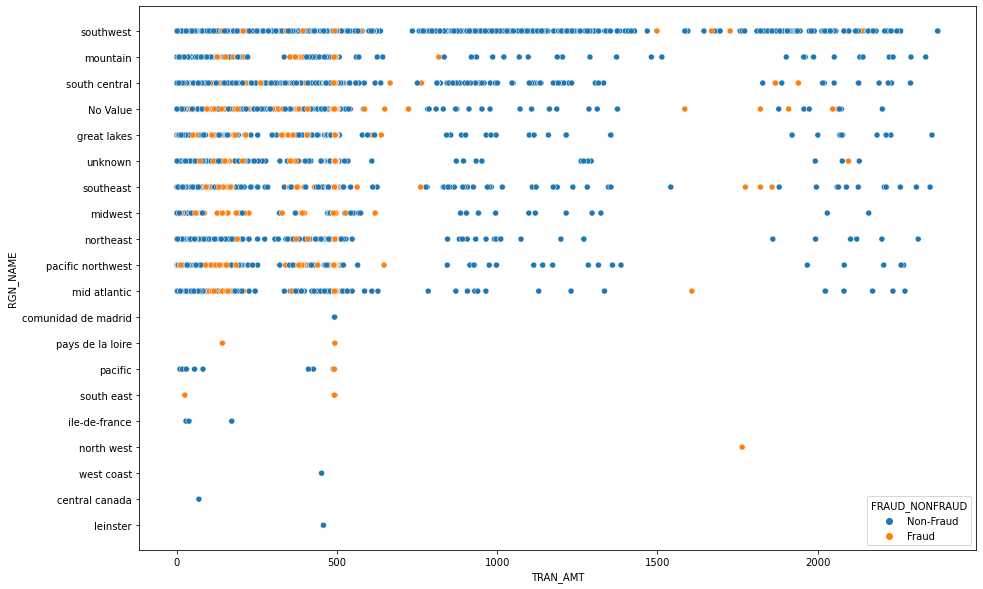

In [21]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=df_train, x="TRAN_AMT", y="RGN_NAME", hue="FRAUD_NONFRAUD")

<AxesSubplot:xlabel='TRAN_AMT', ylabel='CUST_AGE'>

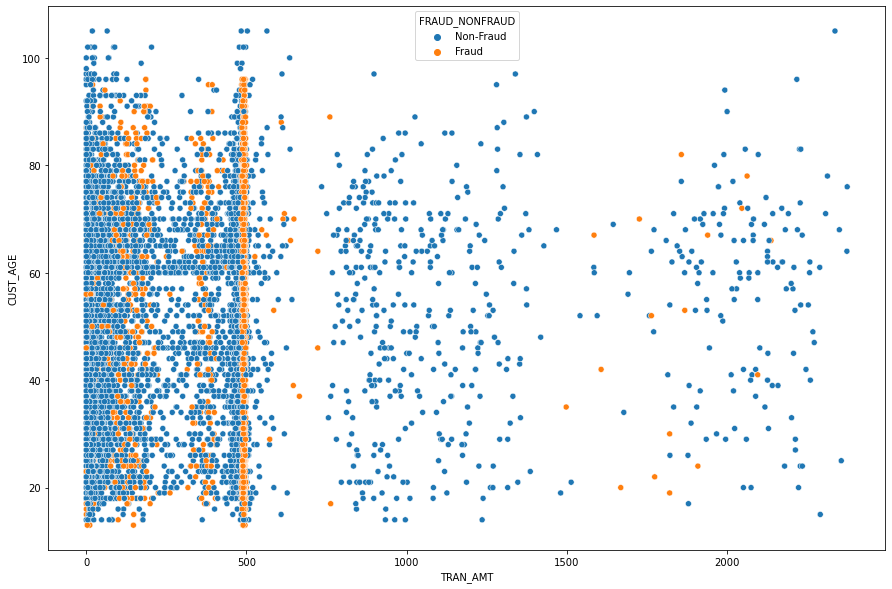

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=df_train_clean, x="TRAN_AMT", y="CUST_AGE", hue="FRAUD_NONFRAUD")

In [23]:
cols = ['TRAN_AMT', 'ACCT_PRE_TRAN_AVAIL_BAL', 'CUST_AGE', 'OPEN_ACCT_CT',
       'WF_dvc_age', 'CARR_NAME', 'RGN_NAME', 'STATE_PRVNC_TXT',
       'ALERT_TRGR_CD', 'DVC_TYPE_TXT', 'AUTHC_PRIM_TYPE_CD',
       'AUTHC_SCNDRY_STAT_TXT', 'CUST_ZIP', 'PH_NUM_UPDT_TS']

In [24]:
combined_clean = pd.concat([df_train_clean[cols], df_test_clean[cols]], axis=0)

In [25]:
combined_clean.reset_index(drop=True)

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,ALERT_TRGR_CD,DVC_TYPE_TXT,AUTHC_PRIM_TYPE_CD,AUTHC_SCNDRY_STAT_TXT,CUST_ZIP,PH_NUM_UPDT_TS
0,5.38,23619.91,47,4,2777,cox communications inc.,southwest,nevada,MOBL,No Value,UN_PWD,ALLOW,89002,2/24/2021 15:55:10
1,65.19,0.00,45,5,2721,charter communications,southwest,california,MOBL,No Value,FACE_ID,ALLOW,94541,Not Given
2,54.84,34570.63,36,8,1531,utah broadband llc,mountain,utah,ONLN,DESKTOP,UN_PWD,ALLOW,21811,5/5/2019 1:8:39
3,0.01,0.00,62,3,835,t-mobile usa inc.,southwest,california,MOBL,MOBILE,UN_PWD,ALLOW,89822,2/16/2019 6:45:37
4,497.08,12725.18,81,2,1095,cogent communications,south central,texas,MOBL,MOBILE,UN_PWD,CHALLENGE_SUCCESS,84108,5/8/2020 10:27:6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,449.45,0.00,54,6,504,charter communications inc,southwest,california,MOBL,DESKTOP,UN_PWD,ALLOW,77459,7/5/2020 6:11:39
19996,488.72,34842.64,64,7,0,No Value,No Value,No Value,ONLN,MOBILE,UN_PWD,ALLOW,98034,5/15/2021 13:50:5
19997,0.01,0.00,50,5,457,frontier communications of america inc.,southwest,california,MOBL,MOBILE,UN_PWD,ALLOW,56374,7/8/2020 6:45:39
19998,211.10,3197.42,37,20,6,google llc,southwest,california,ONLN,TABLET,UN_PWD,ALLOW,92173,Not Given


In [26]:
combined_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 6000
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TRAN_AMT                 20000 non-null  float64
 1   ACCT_PRE_TRAN_AVAIL_BAL  20000 non-null  float64
 2   CUST_AGE                 20000 non-null  int64  
 3   OPEN_ACCT_CT             20000 non-null  int64  
 4   WF_dvc_age               20000 non-null  int64  
 5   CARR_NAME                20000 non-null  object 
 6   RGN_NAME                 20000 non-null  object 
 7   STATE_PRVNC_TXT          20000 non-null  object 
 8   ALERT_TRGR_CD            20000 non-null  object 
 9   DVC_TYPE_TXT             20000 non-null  object 
 10  AUTHC_PRIM_TYPE_CD       20000 non-null  object 
 11  AUTHC_SCNDRY_STAT_TXT    20000 non-null  object 
 12  CUST_ZIP                 20000 non-null  int64  
 13  PH_NUM_UPDT_TS           20000 non-null  object 
dtypes: float64(2), int64(4)

In [27]:
dummy = pd.get_dummies(combined_clean['RGN_NAME'])
combined_clean = pd.concat([combined_clean, dummy],axis = 1)

In [29]:
combined_clean = combined_clean.drop(['RGN_NAME'],axis = 1)

In [30]:
combined_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 6000
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TRAN_AMT                 20000 non-null  float64
 1   ACCT_PRE_TRAN_AVAIL_BAL  20000 non-null  float64
 2   CUST_AGE                 20000 non-null  int64  
 3   OPEN_ACCT_CT             20000 non-null  int64  
 4   WF_dvc_age               20000 non-null  int64  
 5   CARR_NAME                20000 non-null  object 
 6   STATE_PRVNC_TXT          20000 non-null  object 
 7   ALERT_TRGR_CD            20000 non-null  object 
 8   DVC_TYPE_TXT             20000 non-null  object 
 9   AUTHC_PRIM_TYPE_CD       20000 non-null  object 
 10  AUTHC_SCNDRY_STAT_TXT    20000 non-null  object 
 11  CUST_ZIP                 20000 non-null  int64  
 12  PH_NUM_UPDT_TS           20000 non-null  object 
 13  No Value                 20000 non-null  uint8  
 14  aragon                 

In [31]:
from sklearn.preprocessing import LabelEncoder
for col in combined_clean.columns:
    if combined_clean[col].dtype == "object":
        le = LabelEncoder()
        le.fit(list(combined_clean[col].astype(str).values))
        combined_clean[col] = le.transform(list(combined_clean[col].astype(str).values))

In [32]:
df_train_clean['FRAUD_NONFRAUD'].replace({"Fraud": 0, "Non-Fraud": 1}, inplace=True)

In [33]:
labelled_train = combined_clean[:14000]

In [34]:
labelled_train['FRAUD_NONFRAUD'] = df_train_clean['FRAUD_NONFRAUD']

In [35]:
labelled_test = combined_clean[14000:]

In [36]:
labelled_train

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,CARR_NAME,STATE_PRVNC_TXT,ALERT_TRGR_CD,DVC_TYPE_TXT,AUTHC_PRIM_TYPE_CD,...,pacific,pacific northwest,pays de la loire,south central,south east,southeast,southwest,unknown,west coast,FRAUD_NONFRAUD
1,5.38,23619.91,47,4,2777,126,78,0,2,4,...,0,0,0,0,0,0,1,0,0,1
2,65.19,0.00,45,5,2721,79,17,0,2,2,...,0,0,0,0,0,0,1,0,0,1
3,54.84,34570.63,36,8,1531,536,122,1,0,4,...,0,0,0,0,0,0,0,0,0,0
4,0.01,0.00,62,3,835,474,17,0,1,4,...,0,0,0,0,0,0,1,0,0,1
5,497.08,12725.18,81,2,1095,102,119,0,1,4,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13996,1937.21,230.75,55,4,142,75,17,0,1,4,...,0,0,0,0,0,0,1,0,0,1
13997,114.38,0.00,44,10,272,474,17,0,1,2,...,0,0,0,0,0,0,1,0,0,1
13998,493.00,2848.63,54,3,517,37,17,0,0,4,...,0,0,0,0,0,0,1,0,0,0
13999,491.64,3163.25,21,3,0,4,0,1,0,4,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

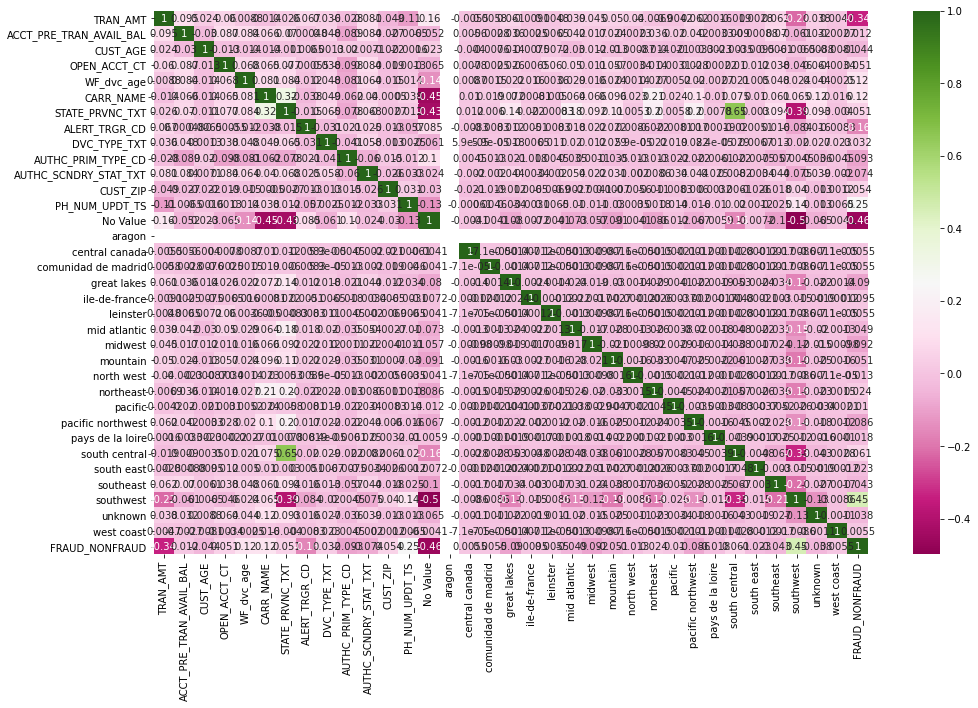

In [37]:
fig, ax = plt.subplots(figsize=(16,10))
corr = labelled_train.corr()
sns.heatmap(corr,annot=True,cmap="PiYG")

#The variables TRAN_AMT, WF_dvc_age, CARR_NAME, RGN_NAME, ALERT_TRGR_CD, PH_NUM_UPDT_TS seem to have a high correlation 
#with the FRAUD_NONFRAUD variable. So these variables are taken into the model.

In [40]:
combined_clean.columns

Index(['TRAN_AMT', 'ACCT_PRE_TRAN_AVAIL_BAL', 'CUST_AGE', 'OPEN_ACCT_CT',
       'WF_dvc_age', 'CARR_NAME', 'STATE_PRVNC_TXT', 'ALERT_TRGR_CD',
       'DVC_TYPE_TXT', 'AUTHC_PRIM_TYPE_CD', 'AUTHC_SCNDRY_STAT_TXT',
       'CUST_ZIP', 'PH_NUM_UPDT_TS', 'No Value', 'aragon', 'central canada',
       'comunidad de madrid', 'great lakes', 'ile-de-france', 'leinster',
       'mid atlantic', 'midwest', 'mountain', 'north west', 'northeast',
       'pacific', 'pacific northwest', 'pays de la loire', 'south central',
       'south east', 'southeast', 'southwest', 'unknown', 'west coast'],
      dtype='object')

In [41]:
labelled_train.head(10)

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,CARR_NAME,STATE_PRVNC_TXT,ALERT_TRGR_CD,DVC_TYPE_TXT,AUTHC_PRIM_TYPE_CD,...,pacific,pacific northwest,pays de la loire,south central,south east,southeast,southwest,unknown,west coast,FRAUD_NONFRAUD
1,5.38,23619.91,47,4,2777,126,78,0,2,4,...,0,0,0,0,0,0,1,0,0,1
2,65.19,0.00,45,5,2721,79,17,0,2,2,...,0,0,0,0,0,0,1,0,0,1
3,54.84,34570.63,36,8,1531,536,122,1,0,4,...,0,0,0,0,0,0,0,0,0,0
4,0.01,0.00,62,3,835,474,17,0,1,4,...,0,0,0,0,0,0,1,0,0,1
5,497.08,12725.18,81,2,1095,102,119,0,1,4,...,0,0,0,1,0,0,0,0,0,0
6,488.55,2851.44,45,8,1,518,17,1,1,3,...,0,0,0,0,0,0,1,0,0,0
7,490.60,3018.98,55,7,531,126,17,0,2,4,...,0,0,0,0,0,0,1,0,0,0
8,468.40,0.00,56,6,47,474,17,1,1,4,...,0,0,0,0,0,0,1,0,0,1
9,0.01,0.00,36,6,1182,126,17,1,1,1,...,0,0,0,0,0,0,1,0,0,1
10,14.23,1890.65,72,4,276,4,0,1,2,4,...,0,0,0,0,0,0,0,0,0,0


In [42]:
target = 'FRAUD_NONFRAUD'
col = ['TRAN_AMT',
       'WF_dvc_age', 'CARR_NAME','PH_NUM_UPDT_TS',
       'ALERT_TRGR_CD','No Value', 'aragon', 'central canada',
       'comunidad de madrid', 'great lakes', 'ile-de-france', 'leinster',
       'mid atlantic', 'midwest', 'mountain', 'north west', 'northeast',
       'pacific', 'pacific northwest', 'pays de la loire', 'south central',
       'south east', 'southeast', 'southwest', 'unknown', 'west coast']

In [43]:
# Define a random state 

state = np.random.RandomState(42)
X = labelled_train[col]
Y = labelled_train[target]

X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(14000, 26)
(14000,)


In [44]:
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [45]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)


In [46]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 515,  332],
       [ 191, 1762]])

Text(0.5, 257.44, 'Predicted label')

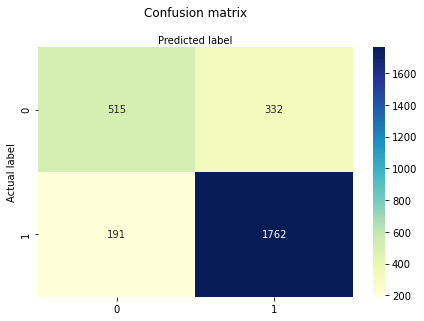

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [48]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred,pos_label=0))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.8132142857142857
Precision: 0.8414517669531996
Recall: 0.6080283353010626
F1 Score: 0.8707684704719545


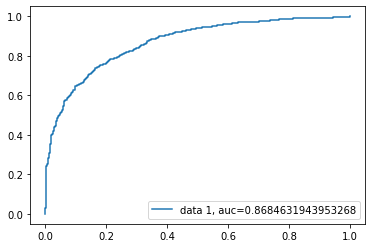

In [49]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [50]:
# 2. K-Nearest Neighbors

n = 5
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train,y_train)
knn_yhat = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred,pos_label=0))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.8132142857142857
Precision: 0.8414517669531996
Recall: 0.6080283353010626
F1 Score: 0.8707684704719545


In [51]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred,pos_label=0))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.8132142857142857
Precision: 0.8414517669531996
Recall: 0.6080283353010626
F1 Score: 0.8707684704719545


In [52]:
# Define a random state 

state = np.random.RandomState(42)
X = labelled_train[col]
Y = labelled_train[target]

X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(14000, 26)
(14000,)


In [53]:
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=100)

In [54]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=10)
  
# Performing training
clf_gini.fit(X_train, y_train)
y_pred = clf_gini.predict(X_test)

In [55]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 901,  129],
       [  96, 2374]])

Text(0.5, 257.44, 'Predicted label')

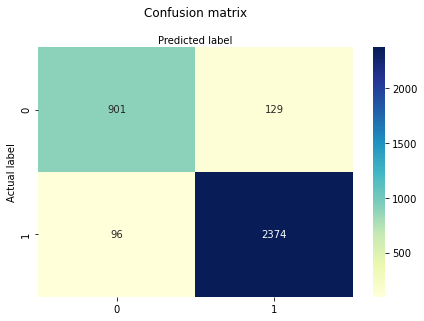

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=['Fraud','Not-Fraud'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [57]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#The decision tree model performed better than logistic regression model as 
#there was high variance in the FRAUD_NONFRAUD variable

Accuracy: 0.9357142857142857
Precision: 0.9484618457850579
Recall: 0.9611336032388664
F1 Score: 0.9547556806756485


In [58]:
#Creating the model using all the training data
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=5, min_samples_leaf=10)
  
# Performing training
clf_gini.fit(X, Y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=100)

In [59]:
#Predicting the FRAUD_NONFRAUD dataset
X_test = labelled_test[col]
y_pred = clf_gini.predict(X_test)

In [60]:
df_test_clean['FRAUD_NONFRAUD'] = y_pred

In [61]:
df_train_clean.describe()

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,CUST_ZIP,FRAUD_NONFRAUD
count,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000
mean,275.377747,10233.110609,53.937214,6.666714,611.061571,74007.681071,0.702571
std,317.892333,29967.453812,18.829836,9.059419,668.113489,24948.053588,0.457143
min,0.010000,0.000000,13.000000,0.000000,-117.000000,0.000000,0.000000
25%,11.322500,0.000000,39.000000,3.000000,75.000000,63123.000000,0.000000
50%,161.355000,2410.395000,59.000000,5.000000,365.500000,85037.000000,1.000000
75%,488.822500,4732.695000,68.000000,7.000000,961.000000,92201.000000,1.000000
max,2376.060000,361519.050000,105.000000,227.000000,2783.000000,99835.000000,1.000000


In [62]:
#The distribution of the varibale of train and test dataset is almost similar for all the variables. 
#Checking if the FRAUD_NONFRAUD variable also has similar characteristics
df_test_clean.describe()

,dataset_id,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,CUST_ZIP,FRAUD_NONFRAUD
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,3000.500000,266.761870,10707.551100,53.690333,6.644833,614.424833,74763.916167,0.706500
std,1732.195139,300.251429,30657.706826,18.845750,9.974113,669.629549,24346.009155,0.455403
min,1.000000,0.010000,0.000000,13.000000,0.000000,-88.000000,0.000000,0.000000
25%,1500.750000,11.432500,0.000000,39.000000,3.000000,71.000000,75002.000000,0.000000
50%,3000.500000,144.195000,2492.690000,59.000000,5.000000,373.500000,85086.000000,1.000000
75%,4500.250000,488.910000,4883.027500,68.000000,7.000000,968.250000,92253.000000,1.000000
max,6000.000000,2305.550000,323860.060000,105.000000,227.000000,2782.000000,99801.000000,1.000000


In [63]:
#Exporting Data in CSV
df_test_clean[['dataset_id','FRAUD_NONFRAUD']].to_csv('/Users/akhilanunna/Documents/Documents/WellsfargoCompetition\predicted_data.csv', index = False)

In [64]:
labelled_train[col].to_csv('/Users/akhilanunna/Documents/Documents/WellsfargoCompetition\labelled_train.csv', index = False)
labelled_train[target].to_csv('/Users/akhilanunna/Documents/Documents/WellsfargoCompetition\labelled_target.csv', index = False)

In [65]:
# calculate the Pearson's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# seed random number generator
seed(1)
# calculate Pearson's correlation
corr, _ = pearsonr(labelled_train.TRAN_AMT,labelled_train.FRAUD_NONFRAUD)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.336
